# API Code

In [1]:
!pip install kabaddiPy --upgrade


# Initializing the API


In [2]:
import kabaddiPy

pkl = kabaddiPy.PKL()


## Comparing the total-points scored by a player(s) for each match over a season  

The 3 players in question are: 

Mohammadreza Chiyaneh, Krishan and Yogesh as they have the highest Tackle Points scored in Season 10.

From my background research and conversations and matches watched, I know that *Mohammadreza Chiyaneh* plays for **Puneri Palan**, *Krishan* plays for **Patna Pirates** and *Yogesh* plays for **Dabang Delhi K.C**.

However, I do not know their team IDs. I will use the API to get the team IDs for the 3 players.


#### First getting the standings for Season 10 to get the `Team_Id` for the player I'm interested in...


In [3]:
pkl.get_standings(season=10)


,Group,Season,Team_Id,Team_Name,League_position,Matches_played,Wins,Lost,Tied,Draws,No Result,League_points,Score_diff,Qualified
0,Main,10,7,Puneri Paltan,1,22,17,2,3,0,0,96,253,True
1,Main,10,3,Jaipur Pink Panthers,2,22,16,3,3,0,0,92,141,True
2,Main,10,2,Dabang Delhi K.C.,3,22,13,6,3,0,0,79,53,True
3,Main,10,31,Gujarat Giants,4,22,13,9,0,0,0,70,32,True
4,Main,10,28,Haryana Steelers,5,22,13,8,1,0,0,70,-13,True
5,Main,10,6,Patna Pirates,6,22,11,8,3,0,0,69,50,True
6,Main,10,4,Bengal Warriorz,7,22,9,11,2,0,0,55,-43,False
7,Main,10,1,Bengaluru Bulls,8,22,8,12,2,0,0,53,-67,False
8,Main,10,29,Tamil Thalaivas,9,22,9,13,0,0,0,51,32,False
9,Main,10,5,U Mumba,10,22,6,13,3,0,0,45,-79,False


#### Then getting the `team_roster` for that team for that season to discover the `player_id` of that player


In [4]:
pkl.get_team_roster(season=10, team_id=7)


,Player ID,Name,Jersey Number,Captain Count,Played Count,Green Card Count,Yellow Card Count,Red Card Count,Starter Count,Top Raider Count,Top Defender Count,Total Points,Team ID,Team Name,Total Matches in Season
0,4960,Aslam Mustafa Inamdar,3,21,23,3,0,0,21,9,0,168,7,Puneri Paltan,24
1,4192,Abinesh Nadarajan,4,0,24,1,0,0,24,0,4,57,7,Puneri Paltan,24
2,3234,Sanket Sawant,10,0,22,4,1,0,21,0,1,32,7,Puneri Paltan,24
3,3233,Pankaj Mohite,12,0,22,1,0,0,21,5,0,110,7,Puneri Paltan,24
4,4022,Mohit Goyat,88,0,22,1,0,0,21,7,1,151,7,Puneri Paltan,24
5,5128,Gaurav Khatri,20,0,24,3,0,0,24,0,6,72,7,Puneri Paltan,24
6,4925,Mohammadreza Chiyaneh,8,3,24,2,0,0,24,1,12,126,7,Puneri Paltan,24
7,5256,Vahid RezaEimehr,6,0,5,0,0,0,2,0,0,6,7,Puneri Paltan,24
8,5151,Dadaso Pujari,7,0,5,1,0,0,0,0,0,6,7,Puneri Paltan,24
9,5116,Aditya Shinde,11,0,12,0,0,0,3,0,0,17,7,Puneri Paltan,24


Now that I've identified the player-id for Mohammadreza Chiyaneh as `4925`, I want to see what data can I extract about him per-match for the season


In [6]:
display(pkl.get_matchwise_player_info(season=10, player_id=4925).columns)


Index(['match_id', 'date', 'team_name', 'team_score', 'opponent_name',
       'opponent_score', 'played', 'starter', 'on_court', 'captain',
       'total_points', 'raid_points', 'tackle_points', 'raids_total',
       'raids_successful', 'raids_unsuccessful', 'raids_empty', 'super_raids',
       'tackles_total', 'tackles_successful', 'tackles_unsuccessful',
       'super_tackles', 'green_card_count', 'yellow_card_count',
       'red_card_count', 'top_raider', 'top_defender', 'substitutions',
       'first_substitution_time', 'matches_played', 'matches_started',
       'average_points_full_season', 'total_substitutions_full_season'],
      dtype='object')

In [7]:
player_match = pkl.get_matchwise_player_info(season=10, player_id=4925)
# player_match = player_match.sort_values(['date'], ascending=False)
display(player_match)


,match_id,date,team_name,team_score,opponent_name,opponent_score,played,starter,on_court,captain,...,yellow_card_count,red_card_count,top_raider,top_defender,substitutions,first_substitution_time,matches_played,matches_started,average_points_full_season,total_substitutions_full_season
0,3097,1/13/2024,Puneri Paltan,34,Jaipur Pink Panthers,36,True,True,True,False,...,0,0,False,False,0,NaN,24,24,5.25,4
1,3061,12/20/2023,Puneri Paltan,43,Bengaluru Bulls,18,True,True,True,False,...,0,0,False,True,0,NaN,24,24,5.25,4
2,3111,1/21/2024,Puneri Paltan,34,Gujarat Giants,24,True,True,True,False,...,0,0,False,True,0,NaN,24,24,5.25,4
3,3135,2/5/2024,Puneri Paltan,30,Dabang Delhi K.C.,30,True,True,True,False,...,0,0,False,True,0,NaN,24,24,5.25,4
4,3159,2/21/2024,Puneri Paltan,40,U.P. Yoddhas,38,True,True,True,True,...,0,0,False,True,0,NaN,24,24,5.25,4
5,3149,2/14/2024,Puneri Paltan,29,Bengal Warriors,26,True,True,False,True,...,0,0,False,False,0,NaN,24,24,5.25,4
6,3137,2/7/2024,Puneri Paltan,40,Bengaluru Bulls,31,True,True,True,False,...,0,0,False,False,0,NaN,24,24,5.25,4
7,3163,2/28/2024,Puneri Paltan,37,Patna Pirates,21,True,True,False,False,...,0,0,False,True,0,NaN,24,24,5.25,4
8,3053,12/16/2023,Puneri Paltan,49,Bengal Warriors,19,True,True,True,False,...,0,0,False,True,0,NaN,24,24,5.25,4
9,3165,3/1/2024,Puneri Paltan,28,Haryana Steelers,25,True,True,False,False,...,0,0,False,False,0,NaN,24,24,5.25,4


In [8]:
l_4925 = pkl.get_matchwise_player_info(season=10, player_id=4925)['total_points'].tolist()
print(l_4925)
print(len(l_4925))


[4, 7, 9, 4, 5, 3, 4, 5, 6, 2, 6, 8, 5, 6, 4, 2, 5, 5, 5, 8, 7, 7, 3, 6]
24


I will now try and get the player-id for Krishan who plays in team-id 6.


In [9]:
roster_df = pkl.get_team_roster(season=10, team_id=6, )
display(roster_df)


,Player ID,Name,Jersey Number,Captain Count,Played Count,Green Card Count,Yellow Card Count,Red Card Count,Starter Count,Top Raider Count,Top Defender Count,Total Points,Team ID,Team Name,Total Matches in Season
0,757,Sachin,99,8,22,2,0,0,22,9,1,184,6,Patna Pirates,24
1,3107,Neeraj Kumar,5,14,14,0,0,0,14,0,4,31,6,Patna Pirates,24
2,4957,Manish,1,0,15,4,0,0,10,0,0,13,6,Patna Pirates,24
3,4193,Sudhakar M,7,0,19,1,0,0,18,5,0,105,6,Patna Pirates,24
4,763,Manjeet,10,1,22,1,0,0,20,4,0,120,6,Patna Pirates,24
5,4949,Krishan,4,1,24,2,1,0,24,0,10,78,6,Patna Pirates,24
6,5169,Ankit,2,0,23,2,0,0,23,0,6,66,6,Patna Pirates,24
7,5090,Naveen Sharma,3,0,5,0,0,0,0,0,0,1,6,Patna Pirates,24
8,5092,Thiyagarajan Yuvaraj,12,0,9,0,0,0,1,0,1,6,6,Patna Pirates,24
9,5282,Sandeep Kumar,14,0,20,1,0,0,9,5,0,87,6,Patna Pirates,24


From the roster I see that Krishan has a player-id of `4949`


In [11]:
l_4949 = pkl.get_matchwise_player_info(season=10, player_id=4949)['total_points'].tolist()
print(l_4949)
print(len(l_4949))


[1, 5, 5, 1, 3, 2, 5, 8, 0, 4, 4, 5, 3, 2, 3, 2, 2, 3, 2, 4, 3, 4, 2, 5]
24


I do the same thing for Yogesh


In [12]:
roster_df = pkl.get_team_roster(season=10, team_id=2)
sorted_roster_df = roster_df.sort_values(by='Total Points', ascending=False)

display(sorted_roster_df)

# l_4949 = api.get_detailed_player_info(season=10, player_id=4949)['total_points'].tolist()
# print(l_4949)
# print(len(l_4949))


,Player ID,Name,Jersey Number,Captain Count,Played Count,Green Card Count,Yellow Card Count,Red Card Count,Starter Count,Top Raider Count,Top Defender Count,Total Points,Team ID,Team Name,Total Matches in Season
7,4947,Ashu Malik,77,17,23,0,0,0,23,18,0,280,2,Dabang Delhi K.C.,23
12,5144,Yogesh,9,0,23,1,0,0,23,0,10,77,2,Dabang Delhi K.C.,23
16,2296,Naveen Kumar,10,6,6,0,0,0,6,5,0,72,2,Dabang Delhi K.C.,23
11,3965,Manjeet,18,0,20,0,0,0,15,0,0,63,2,Dabang Delhi K.C.,23
10,4183,Meetu Sharma,2,0,22,0,0,0,21,0,0,61,2,Dabang Delhi K.C.,23
13,5141,Ashish,11,0,19,2,0,0,15,0,5,48,2,Dabang Delhi K.C.,23
0,3083,Vishal Bhardwaj,7,0,19,4,1,0,8,0,5,38,2,Dabang Delhi K.C.,23
9,5196,Vikrant,50,0,18,0,0,0,18,0,2,25,2,Dabang Delhi K.C.,23
8,5319,Mohit,55,0,20,0,1,0,19,0,0,18,2,Dabang Delhi K.C.,23
14,5142,Himmat Antil,4,0,8,2,0,0,5,0,1,12,2,Dabang Delhi K.C.,23


In [14]:
l_5144 = pkl.get_matchwise_player_info(season=10, player_id=5144)['total_points'].tolist()
print(l_5144)
print(len(l_5144))


[3, 2, 4, 1, 4, 5, 8, 3, 3, 1, 5, 4, 2, 3, 3, 3, 4, 0, 4, 1, 5, 3, 6]
23


Now as Yogesh has played one-less match, I assume that he scored 0 points in the last match.


In [15]:
l_5144_2 = l_5144 + [0]


Then, I go ahead and plot the data for the 3 players to compare their performance over the season

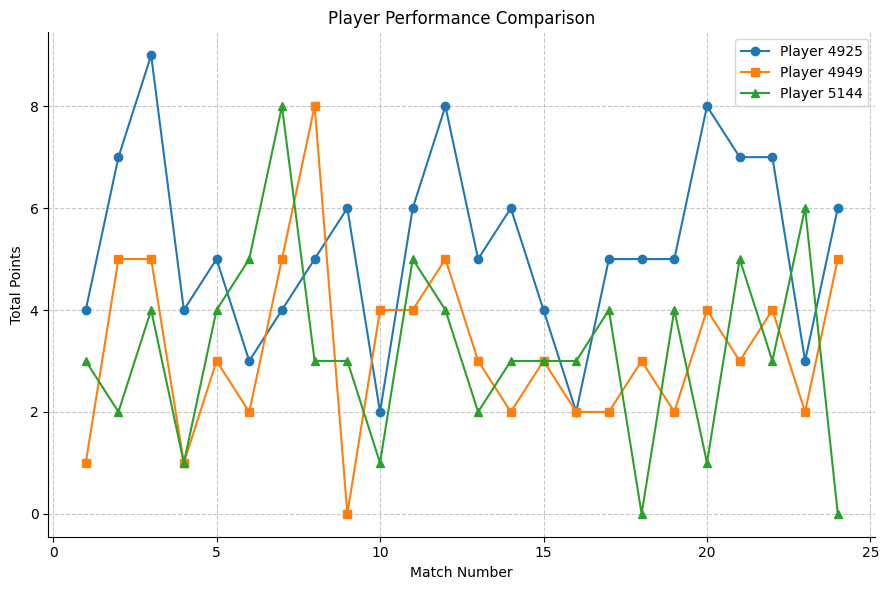

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots(figsize=(9, 6))

# Create x-axis values (match numbers)
x = np.arange(1, len(l_4925) + 1)

# Plot the data for each player
ax.plot(x, l_4925, label='Player 4925', marker='o')
ax.plot(x, l_4949, label='Player 4949', marker='s')
ax.plot(x, l_5144_2, label='Player 5144', marker='^')

# Customize the plot
ax.set_xlabel('Match Number')
ax.set_ylabel('Total Points')
ax.set_title('Player Performance Comparison')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

# Add some styling
# plt.style.use('seaborn')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


## Another Usecase


#### Plot the total points for a particular player-id over multiple seasons


Say I want to see how `Pardeep Narwal` (Player-ID: `197`) a famous player has performed over various editions of PKL...


In [18]:
points_list = []
for i in range(1, 11):
    # print(i)
    if pkl.get_matchwise_player_info(season=i, player_id=197).empty:
        points_list.append(0)
        continue
    else:
        # print(sum(api.get_detailed_player_info(season=i, player_id=197)['total_points']))
        points_list.append(sum(pkl.get_matchwise_player_info(season=i, player_id=197)['total_points']))



No data found for player 197 in season 1


In [19]:
print(points_list)


[0, 9, 121, 133, 369, 233, 304, 188, 220, 122]


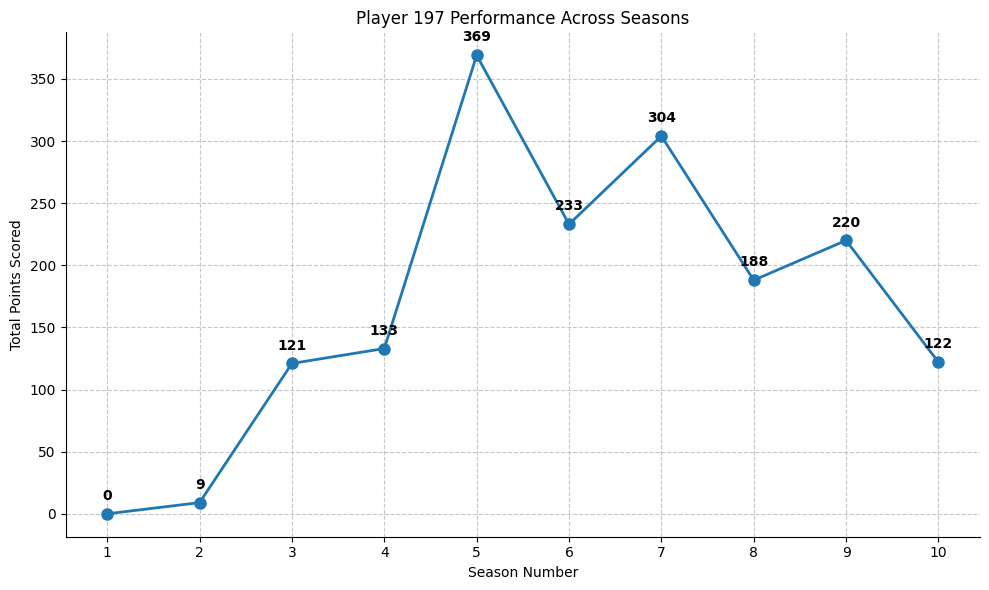

In [20]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create x-axis values (season numbers)
seasons = range(1, 11)

# Plot the data
ax.plot(seasons, points_list[:], marker='o', linestyle='-', linewidth=2, markersize=8)

# Customize the plot
ax.set_xlabel('Season Number')
ax.set_ylabel('Total Points Scored')
ax.set_title('Player 197 Performance Across Seasons')
ax.set_xticks(seasons)
ax.grid(True, linestyle='--', alpha=0.7)

# Add data labels
for season, points in zip(seasons, points_list):
    ax.annotate(f'{points}', (season, points), textcoords="offset points", 
                xytext=(0,10), ha='center', fontweight='bold')

# Styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# End
